#instlling requirements 

In [91]:
%pip install numpy
%pip install nltk
%pip install pandas 
%pip install scikit-learn
%pip install stopwords
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


#importing libraries 

In [77]:

#Pandas: Facilitates efficient data manipulation and analysis tasks.
import pandas as pd 

#NumPy: Foundation for numerical computing and scientific operations.
import numpy as np
#Sklearn : sklearn is a Python module integrating classical machine learning algorithms in the tightly-knit world of scientific Python packages (numpy, scipy, matplotlib).
import sklearn
#nltk : The Natural Language Toolkit (NLTK) is an open source Python library for Natural Language Processing. A free online book is available. (If you use the library for academic research, please cite the book.)
import nltk 
from nltk.corpus import stopwords

#importing differents data parts and merging them 

In [78]:
#importing three dataset. The dataset is divied into three seperate files 
goEmotionsDataSet1=pd.read_csv("dataSets/goemotions_1.csv")
goEmotionsDataSet2=pd.read_csv("dataSets/goemotions_2.csv")
goEmotionsDataSet3=pd.read_csv("dataSets/goemotions_3.csv")

In [79]:
#since the dataset is divided into three seperate varaiables  we will join it into one single data variables using the pd.concat function 
data=pd.concat([goEmotionsDataSet1,goEmotionsDataSet2,goEmotionsDataSet3])

#text preprocessing : stop words removal , tokenization ...

In [85]:

nltk.download("stopwords")
stopWords=set(stopwords.words("english"))
def removeStopWords(sentenceVector):
    cleanSentence=[]
    for word in sentenceVector:
        if(str(word).lower() not in stopWords):
            cleanSentence.append(word)
    return cleanSentence

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\INFOKOM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
from  nltk.tokenize import word_tokenize
def tokenizeSentence(sentence):
    return word_tokenize(sentence)

#dividing data into features and labels 

In [82]:
# we  are going to split our data into two seperate parts labels and features
# the features are all text present in the dataset in a column called "text"
features = data['text'] 
# the labels are the last 28 columns were we have 27 emotion valued as 0 if the emotion is present and 1 if its not and another neutral emotion              
labels = data.drop(columns=['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id',
                            'created_utc', 'rater_id', 'example_very_unclear'])  # Selecting emotion columns as labels


In [105]:
### Statistics ###
# Total number of tweets
numberOfTweets = len(features)

# Unique emotions
emotions = labels.columns.tolist()

# Total number of unique emotions
numberOfEmotions = len(emotions)

# Frequency of each emotion
emotionsFrequencies = []
for emotion in emotions:
    emotionCount = labels[emotion].sum()  # Count occurrences of 1 (where emotion label is present)
    emotionsFrequencies.append(emotionCount)

# Print the frequency of each emotion
for emotion, frequency in zip(emotions, emotionsFrequencies):
    print(f"{emotion}: {frequency}")

# Print total number of tweets and unique emotions
print("Total number of tweets:", numberOfTweets)
print("Total number of unique emotions:", numberOfEmotions)


admiration: 17131
amusement: 9245
anger: 8084
annoyance: 13618
approval: 17620
caring: 5999
confusion: 7359
curiosity: 9692
desire: 3817
disappointment: 8469
disapproval: 11424
disgust: 5301
embarrassment: 2476
excitement: 5629
fear: 3197
gratitude: 11625
grief: 673
joy: 7983
love: 8191
nervousness: 1810
optimism: 8715
pride: 1302
realization: 8785
relief: 1289
remorse: 2525
sadness: 6758
surprise: 5514
neutral: 55298
Total number of tweets: 211225
Total number of unique emotions: 28


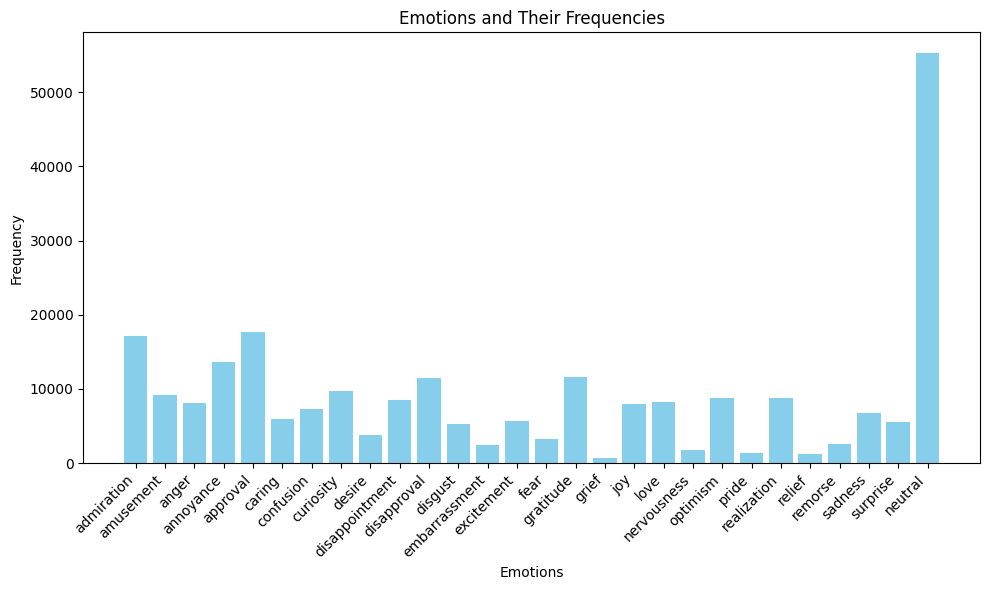

In [106]:
import matplotlib.pyplot as plt

# Plot emotions and their frequencies
plt.figure(figsize=(10, 6))
plt.bar(emotions, emotionsFrequencies, color='skyblue')
plt.title('Emotions and Their Frequencies')
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


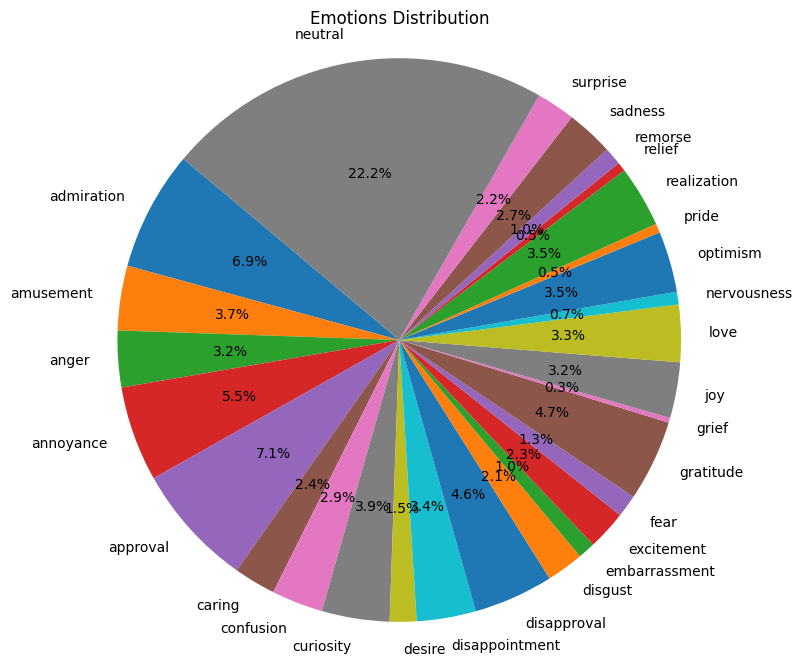

In [107]:
# Plot emotions and their frequencies using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(emotionsFrequencies, labels=emotions, autopct='%1.1f%%', startangle=140)
plt.title('Emotions Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()
